<a href="https://colab.research.google.com/github/Pradyumna-balaji/To-Build-A-Real-Time-Application-For-Gender-And-Age-Detector/blob/main/intial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pradyumnabalaji","key":"9e36f87086d7d99a7bfea985dbfae051"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          16689        352  1.0              
stacknishant/nse-stock-historical-price-data                        NSE Stock Historical price data                      20MB  2024-07-11 10:58:10           1376         24  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12574        265  1.0              
ihelon/coffee-sales                     

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 99% 328M/331M [00:15<00:00, 24.0MB/s]
100% 331M/331M [00:15<00:00, 22.8MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [ ]:
import os
#print(os.getcwd())
fldr="/content/UTKFace"
files=os.listdir(fldr)
#print(len(files))

In [ ]:
ages=[]
genders=[]
images=[]
for fle in files:
    #print(fle)
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    image=cv2.imread(total)
    image1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image2=cv2.resize(image1,(48,48))
    images.append(image2)
    ages.append(age)
    genders.append(gender)
    #print(fle)


28
0


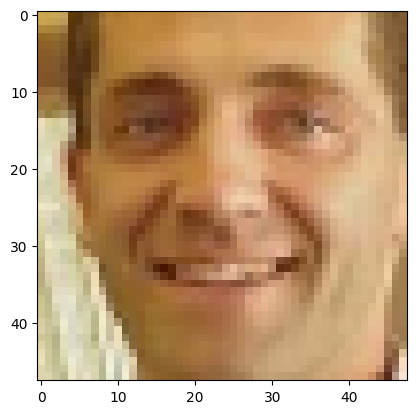

In [ ]:
plt.imshow(images[87])
print(ages[87])
print(genders[87])


In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [ ]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


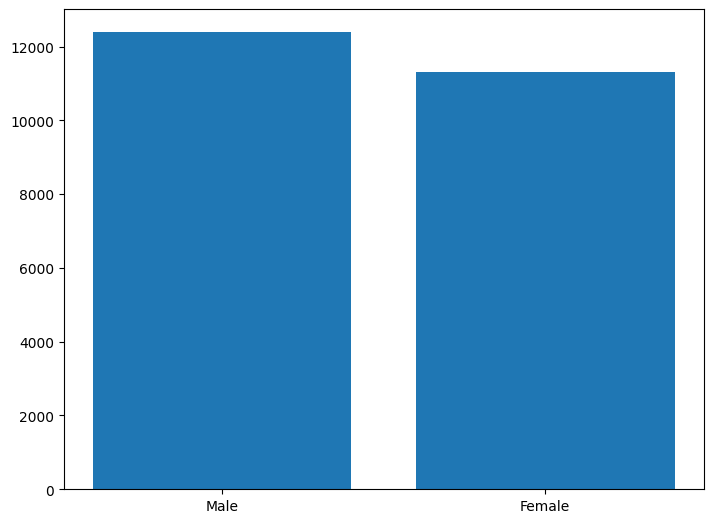

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
genders1=['Male','Female']
values=[12391 ,11317]
ax.bar(genders1,values)
plt.show()

In [ ]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
val=values.tolist()
cn=counts.tolist()

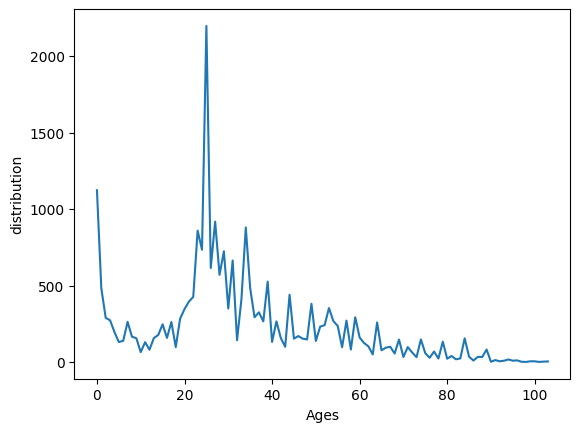

In [ ]:
plt.plot(cn)
plt.xlabel('Ages')
plt.ylabel('distribution')
plt.show()


In [ ]:
lables=[]
i=0
while i< len(ages):
    lable=[]
    lable.append(ages[i])
    lable.append(genders[i])
    lables.append(lable)
    i=i+1
print(lables)

[[62, 0], [20, 0], [32, 1], [28, 0], [25, 1], [14, 0], [44, 0], [80, 0], [1, 0], [30, 1], [27, 0], [17, 0], [29, 1], [66, 1], [27, 0], [26, 0], [1, 0], [61, 0], [70, 0], [58, 0], [86, 0], [24, 1], [25, 0], [26, 1], [25, 1], [3, 1], [60, 1], [24, 1], [58, 0], [65, 0], [40, 0], [26, 0], [89, 0], [25, 1], [5, 0], [41, 0], [28, 0], [25, 1], [38, 1], [38, 0], [47, 0], [1, 1], [3, 0], [1, 0], [30, 0], [21, 0], [26, 0], [30, 0], [34, 0], [35, 0], [4, 0], [52, 1], [53, 0], [65, 0], [66, 0], [26, 0], [72, 1], [50, 0], [45, 1], [20, 0], [37, 1], [30, 0], [42, 0], [26, 0], [23, 0], [50, 0], [35, 1], [8, 1], [25, 1], [36, 1], [40, 0], [65, 1], [13, 1], [24, 0], [2, 1], [37, 1], [39, 0], [26, 0], [60, 0], [26, 1], [23, 1], [40, 1], [34, 0], [21, 1], [26, 1], [15, 0], [35, 1], [28, 0], [26, 1], [24, 0], [27, 0], [35, 1], [3, 0], [24, 0], [65, 0], [45, 0], [53, 0], [27, 1], [22, 0], [7, 0], [32, 0], [26, 1], [49, 0], [5, 1], [59, 0], [4, 0], [25, 0], [2, 0], [39, 0], [54, 0], [26, 0], [26, 0], [1, 1]

In [ ]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
lables_f=np.array(lables)
np.save(fldr+"lables.npy",lables_f)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,lables_f,test_size=0.25)



In [ ]:
Y_train[0:5]

array([[34,  1],
       [26,  1],
       [18,  1],
       [40,  0],
       [18,  1]])

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([1, 1, 1, 0, 1])

In [ ]:
Y_train_2[1][0:5]

array([34, 26, 18, 40, 18])

In [ ]:
def convolution(input_tenser,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tenser)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def c_model(input_shape):
    inputs=Input((input_shape))
    conv_1=convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model


In [ ]:
Models=c_model((48,48,3))


In [ ]:
Models.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
fle_ss='Age_Sex_Detection.h5.keras'
checkpoint=ModelCheckpoint(
    fle_ss,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights="True")
callback_list=[checkpoint,Early_stop]
#print(callback_list)

In [ ]:
History=Models.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.9083 - sex_out_loss: 0.7012 - age_out_loss: 16.0379 - sex_out_accuracy: 0.5296 - age_out_accuracy: 0.0466
Epoch 1: val_loss improved from inf to 16.03162, saving model to Age_Sex_Detection.h5.keras
278/278 [==============================] - 16s 26ms/step - loss: 16.9083 - sex_out_loss: 0.7012 - age_out_loss: 16.0379 - sex_out_accuracy: 0.5296 - age_out_accuracy: 0.0466 - val_loss: 16.0316 - val_sex_out_loss: 0.6926 - val_age_out_loss: 15.1795 - val_sex_out_accuracy: 0.5320 - val_age_out_accuracy: 0.0486
Epoch 2/250
277/278 [============================>.] - ETA: 0s - loss: 13.6382 - sex_out_loss: 0.6929 - age_out_loss: 12.7528 - sex_out_accuracy: 0.5246 - age_out_accuracy: 0.0465
Epoch 2: val_loss did not improve from 16.03162
278/278 [==============================] - 4s 15ms/step - loss: 13.6290 - sex_out_loss: 0.6929 - age_out_loss: 12.7435 - sex_out_accuracy: 0.5248 - age_out_accuracy: 0.0465 - val_loss: 17.3

In [ ]:
Models.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 7.3746 - sex_out_loss: 0.2560 - age_out_loss: 6.1918 - sex_out_accuracy: 0.8951 - age_out_accuracy: 0.0486


[7.374643325805664,
 0.25604236125946045,
 6.191848278045654,
 0.8950565457344055,
 0.048591192811727524]

In [ ]:
pred=Models.predict(X_test)
pred[1]

186/186 [==============================] - 1s 2ms/step


array([[57.6781  ],
       [53.824528],
       [31.064682],
       ...,
       [28.561024],
       [35.941685],
       [27.481522]], dtype=float32)

In [ ]:
from matplotlib import pyplot as plt

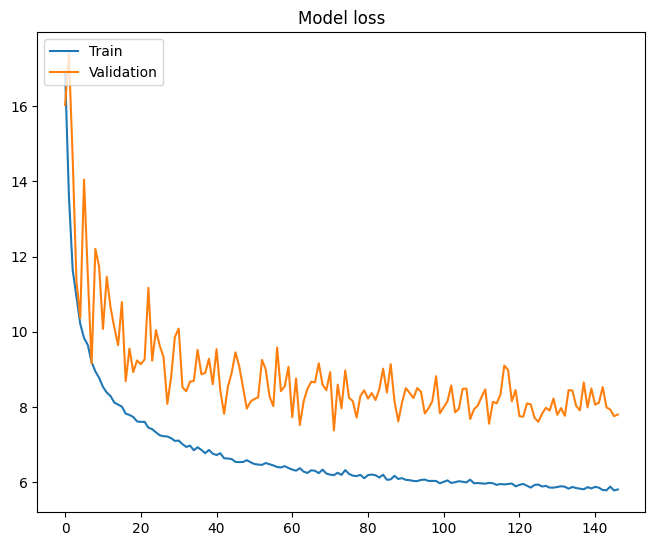

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model loss")
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

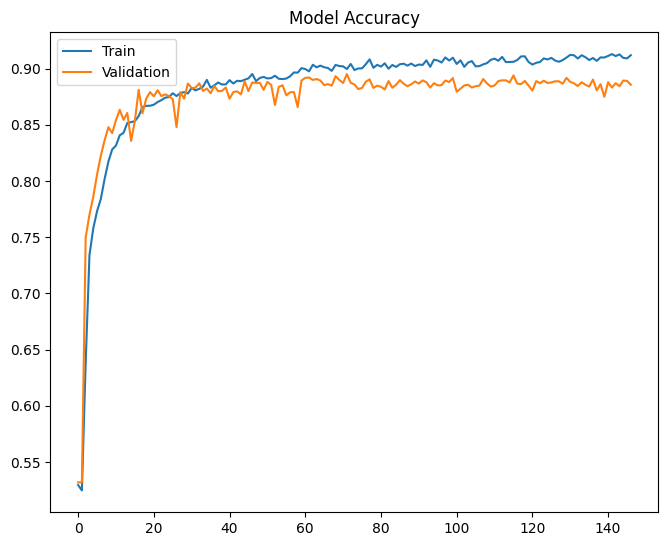

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

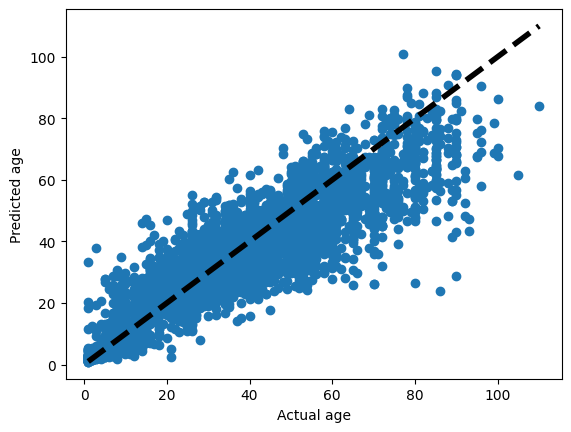

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual age')
ax.set_ylabel('Predicted age')
plt.show()

In [ ]:
i=0
pred_l=[]
while i<len(pred[0]):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1


<ipython-input-45-5b120adc9962>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(pred[0][i])))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3153
           1       0.89      0.88      0.89      2774

    accuracy                           0.90      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.90      0.90      0.90      5927



In [ ]:
results=confusion_matrix(Y_test_2[0],pred_l)

<Axes: >

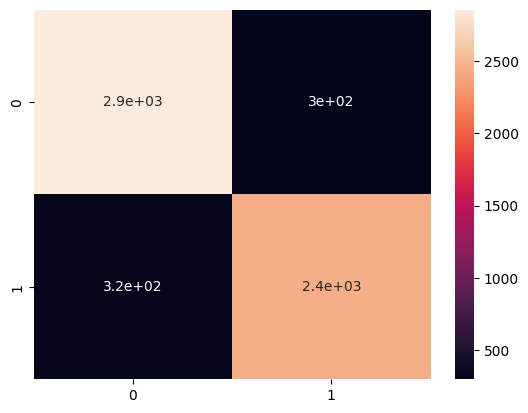

In [ ]:
import seaborn as sns

sns.heatmap(results,annot=True)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    images_test=images_f_2[ind]
    pred_l=Model.predict(np.array([images_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 253ms/step
Predicted Age is 25
Predicted Gender is Female


<ipython-input-51-7e3ab52ffe2e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-51-7e3ab52ffe2e>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


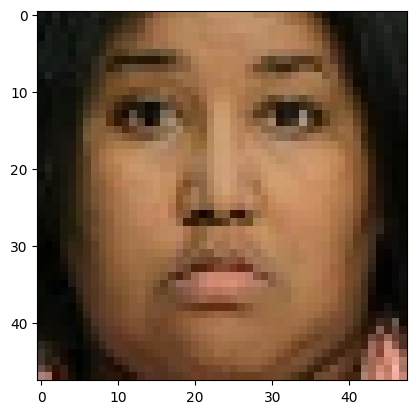

In [ ]:
test_image(4,images_f,images_f_2,Models)

1/1 [==============================] - 0s 66ms/step
Predicted Age is 27
Predicted Gender is Female


<ipython-input-51-7e3ab52ffe2e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-51-7e3ab52ffe2e>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


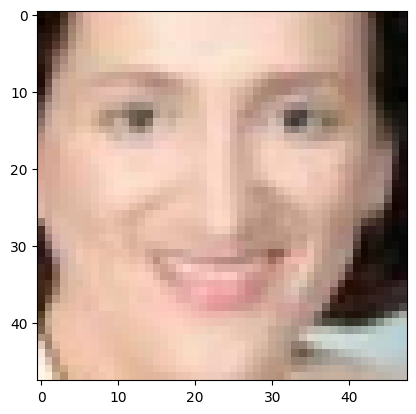

In [ ]:
test_image(2,images_f,images_f_2,Models)